# Régression linéaire

## World Hapiness

Le but de ce prrojet est de **prédire l'indice de bonheur** (variable `Score`) des différents pays du monde en fonction de diverses variables, telles que la production économique, le niveau de corruption perçu, l'espérance de vie, etc.

Pour plus de précision sur les data, voir les liens suivants:
- https://www.kaggle.com/unsdsn/world-happiness
- https://www.kaggle.com/unsdsn/world-happiness/2019.csv

## Exercice


### Load Data
1. Loadez les data.<br>
    `df = pd.read_csv("./data/WorldHapiness/2019.csv")`


### Data Analysis
2. Supprimez la variable `Overall rank`.


3. Visualisez la matrice des correlations ainsi que les "scatter plots" des correlations:<br> 
    `df.corr()`, `sns.heatmap(...)`, `sns.pairplot(...)`.


4. Visualisez la répatition de la variable `Score` (indice de bonheur à prédire):<br>
    `sns.distplot(df['Score'])`


5. Visualisez la valeur de `Score` pour les différents pays:<br>
```
plt.figure(figsize=(25, 10))
sns.barplot(x="Country or region", y="Score", data=df)
plt.xticks(rotation=90)
plt.show()
```


### Data Preprocessing and Splitting
6. Obtenez les **features** `X` et les **targets** `y` à partir de votre dataframe.<br>
    Les **features** corrrespondent à toutes les colonnes sauf `Score` et `Country or region`.<br>
    Les targets corrrespondent à la colonne `Score`.<br>
    Utilisez `df.drop(...)`.


7. Splittez les data en un **train set** et un **test set**.<br>
    Utilisez la fonction `train_test_split(...)`<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


8. Standardisez les features en utilisant un `StandardScaler`:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html<br>
    Que fait cet objet? À quoi cela sert-il de standardiser les donées?


### Model and Results
9. Instanciez et entraînez une **régression linéaire** `LinearRegression` sur vos data:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions sur le test set


10. Calculez la **mean squared error**, la **mean absolute error** et le **R2 score** du modèle sur le test set.<br>
    Que représentent ces scores?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
    
    
11. Représentez le graphe des targets en fonctions des prédictions sur le test set.<br>
    Qu'est-ce que vous pouvez déduire de l'aspect de ce graphe?
    
    
### Other Models
12. Entraînez également les modèles suivants de `scikit-learn`. Vous pouvez vous référer à la documentation de ces modèles pour plus d'information sur leurs utilisations.<br>
    1. `KNeighborsRegressor`
    2. `DecisionTreeRegressor`
    3. `RandomForestRegressor`
    4. `GradientBoostingRegressor`
    5. `AdaBoostRegressor`

# Libraries

In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [8]:
df = pd.read_csv("./data/WorldHapiness/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Data Analysis

In [9]:
# general statistics
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [10]:
# drop column "Overall rank"
df.drop("Overall rank", axis=1, inplace=True)
df.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

<AxesSubplot:>

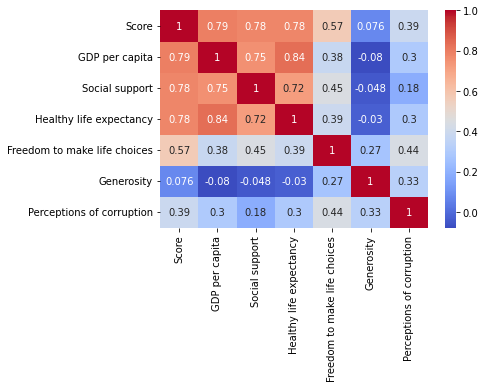

In [11]:
# correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

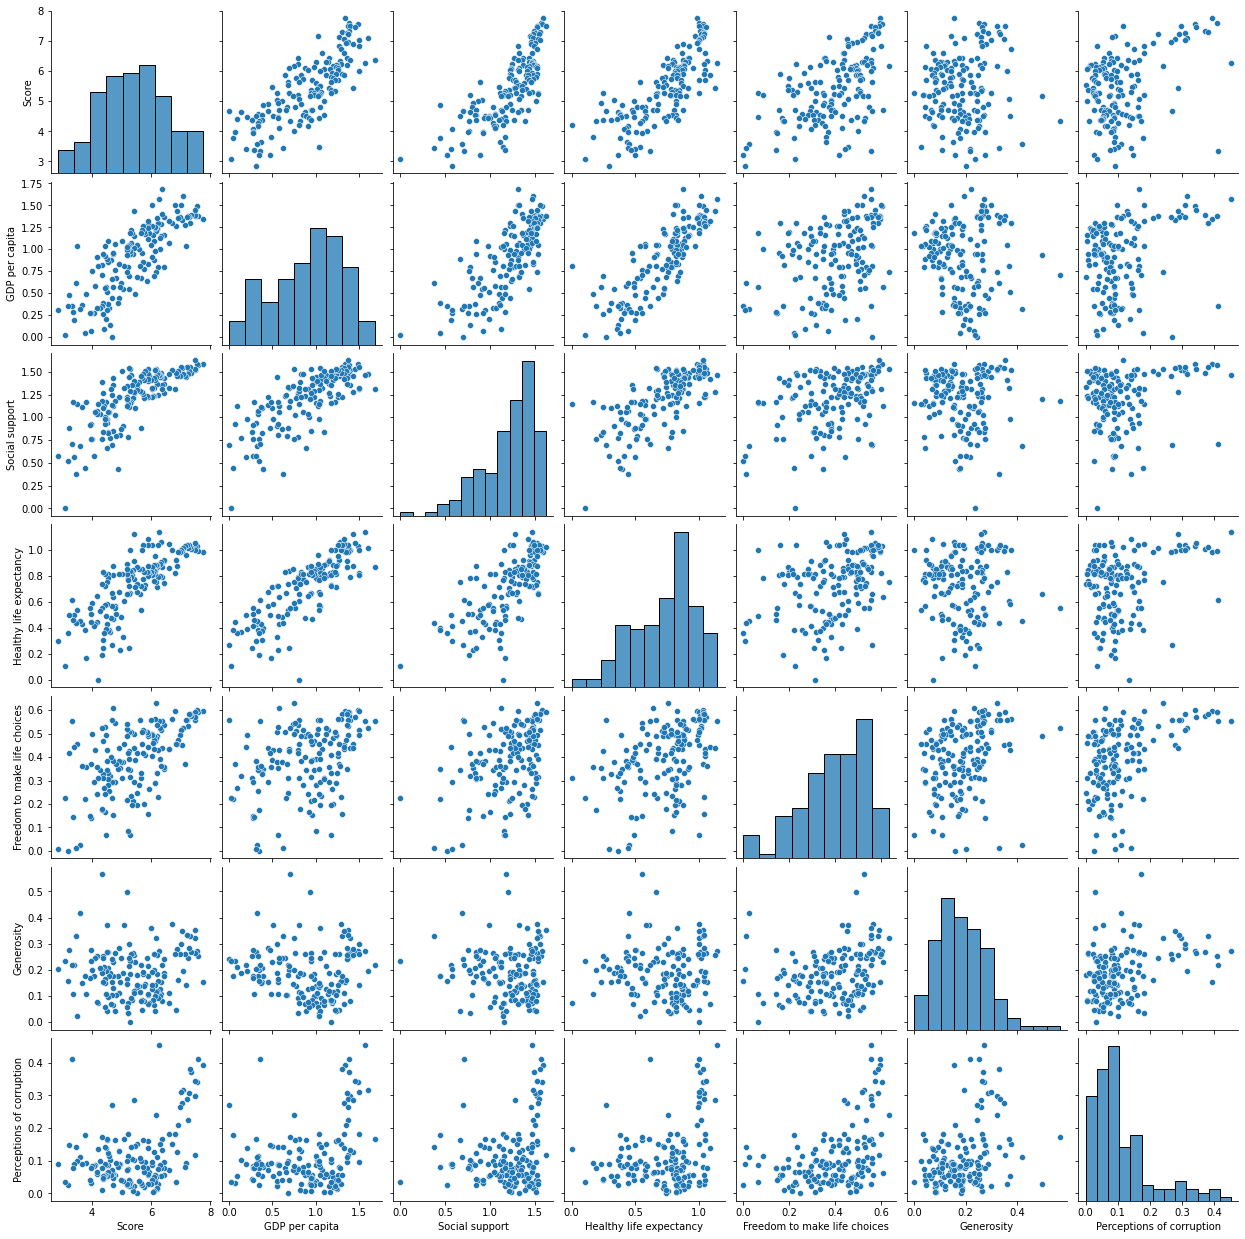

In [12]:
# pairwise correlations
sns.pairplot(df)

/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


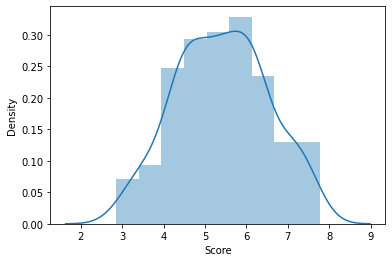

In [13]:
# repartition of "Score"
sns.distplot(df["Score"])
plt.show()

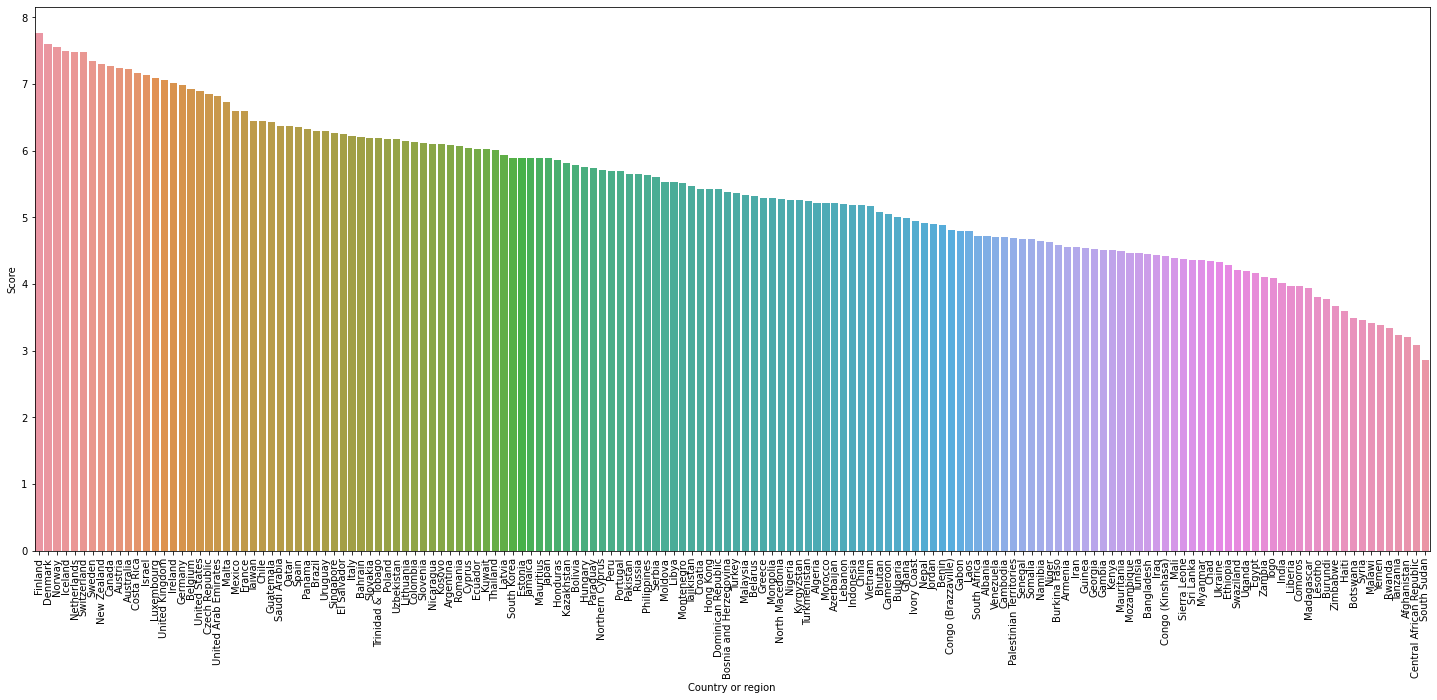

In [14]:
# plot "Score" for all countries
plt.figure(figsize=(25, 10))
sns.barplot(x="Country or region", y="Score", data=df)
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing and Splitting

In [15]:
# features and targets
X = df.drop(['Country or region', 'Score'], axis=1)
y = df['Score']

In [16]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# rescale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit only on train set!
X_test = scaler.transform(X_test)

## Model and Results

In [18]:
# 1. instanciate model
lr = LinearRegression()
# 2. fit model on the train set
lr.fit(X_train, y_train)
# 3. predict on (the train and) test set
lr_pred = lr.predict(X_test)
# 4. get score
lr_score = lr.score(X_test, y_test)
print("Linear Regression Score:\t", lr_score)

Linear Regression Score:	 0.6017537913445685


In [21]:
# compute errors
print("MSE:\t", mean_squared_error(y_test, lr_pred))
print("MAE:\t", mean_absolute_error(y_test, lr_pred))
print("R2:\t", r2_score(y_test, lr_pred))

MSE:	 0.414464138352835
MAE:	 0.49546202287997476
R2:	 0.6017537913445685


Text(0.5, 1.0, 'Targets vs Predictions')

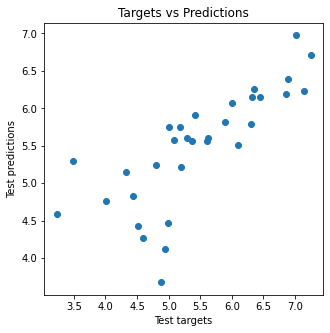

In [23]:
# targets vs predictions
plt.figure(figsize=(5,5))

plt.scatter(y_test, lr_pred)
plt.xlabel("Test targets")
plt.ylabel("Test predictions")
plt.title("Targets vs Predictions")

## Other Models
### KNN, Linear Regression, Random Forest, Gradient Boosting, AdaBoost

In [26]:
# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Score:\t\t\t", knn_score)

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print('Decision Tree Score:\t\t', dt_score)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Score:\t\t", rf_score)

# Gradient Boosting 
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_score = gb.score(X_test, y_test)
print("Gradient Boosting Score:\t", gb_score)

# AdaBoost
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_score = ada.score(X_test, y_test)
print("AdaBoost Score:\t\t\t", ada_score)

KNN Score:			 0.5687029874773399
Decision Tree Score:		 0.3944251156076899
Random Forest Score:		 0.6152979225087063
Gradient Boosting Score:	 0.6075726227899992
AdaBoost Score:			 0.5845817895307179


### Save and Load Model

In [29]:
import pickle

# save model
pickle.dump(lr, open('lr.pkl', 'wb'))

# laod model
lr_2 = pickle.load(open('lr.pkl', 'rb'))

In [30]:
lr_2.predict(X_test)

array([5.7442045 , 5.56511777, 5.60890314, 5.90852816, 4.26855754,
       6.26292955, 5.57869726, 5.15487136, 5.74865818, 4.75898669,
       6.18643741, 5.21627323, 6.97482079, 4.83461768, 6.14786243,
       6.15654394, 4.42594682, 3.67313537, 4.58340625, 5.5586478 ,
       4.116539  , 6.3909045 , 6.23491027, 6.71797974, 5.78862855,
       5.23659213, 5.60434748, 5.820436  , 6.06497255, 4.47065604,
       5.50355705, 5.30073606])